## 1. Bitcoin. Cryptocurrencies. So hot right now.
<p>Since the <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future<sup>1</sup>. In fact, the 6th of December of 2017 Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $200 billion. </p>
<p><center>
<img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_82/img/bitcoint_market_cap_2017.png" style="width:500px"> <br> 
<em>The astonishing increase of Bitcoin market capitalization in 2017.</em></center></p>
<p>*<sup>1</sup>- <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>
<p>That said, let's get to business. As a first task, we will load the current data from the <a href="https://api.coinmarketcap.com">coinmarketcap API</a> and display it in the output.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

In [3]:
# Reading in current data from coinmarketcap.com
current = pd.read_json('https://api.coinmarketcap.com/v1/ticker/')

HTTPError: HTTP Error 403: Forbidden

## 2. Full dataset, filtering, and reproducibility
<p>The previous API call returns only the first 100 coins, and we want to explore as many coins as possible. Moreover, we can't produce reproducible analysis with live online data. To solve these problems, we will load a CSV we conveniently saved on the 6th of December of 2017 using the API call <code>https://api.coinmarketcap.com/v1/ticker/?limit=0</code> named <code>datasets/coinmarketcap_06122017.csv</code>. </p>

In [4]:
dec6=pd.read_csv("datasets/coinmarketcap_06122017.csv")
dec6

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


In [5]:
dec6.drop(columns=["Unnamed: 0"],axis=1,inplace=True)
dec6

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


In [6]:
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd']]

# Counting the number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

## 3. Discard the cryptocurrencies without a market capitalization
<p>Why do the <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [7]:
market_cap_raw.dropna(inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_10356\43565746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_cap_raw.dropna(inplace=True)


## 4. How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

In [8]:
market_cap_raw.value_counts()

id                    market_cap_usd
0x                    1.127090e+08      1
netcoin               6.895300e+05      1
open-trading-network  5.099653e+07      1
opus                  2.420872e+06      1
oraclechain           2.159766e+07      1
                                       ..
environ               1.360000e+02      1
eos                   2.567610e+09      1
eot-token             1.002340e+05      1
equitrader            2.393413e+06      1
zurcoin               3.812150e+05      1
Length: 1031, dtype: int64

In [9]:
market_cap_raw.dtypes

id                 object
market_cap_usd    float64
dtype: object

In [10]:
a=market_cap_raw.sort_values(by="market_cap_usd",ascending=False).head(10)
a

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
5,dash,5.794076e+09
6,litecoin,5.634498e+09
7,bitcoin-gold,4.920065e+09
8,monero,4.331688e+09
9,cardano,3.231420e+09


In [11]:
market_cap_raw.isna().sum()

id                0
market_cap_usd    0
dtype: int64

In [12]:
total=market_cap_raw["market_cap_usd"].sum()
total

374304867542.0

In [13]:
a["market_cap_perc"]=a["market_cap_usd"].apply(lambda x: round(x/total*100,2))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'bitcoin'),
  Text(1, 0, 'ethereum'),
  Text(2, 0, 'bitcoin-cash'),
  Text(3, 0, 'iota'),
  Text(4, 0, 'ripple'),
  Text(5, 0, 'dash'),
  Text(6, 0, 'litecoin'),
  Text(7, 0, 'bitcoin-gold'),
  Text(8, 0, 'monero'),
  Text(9, 0, 'cardano')])

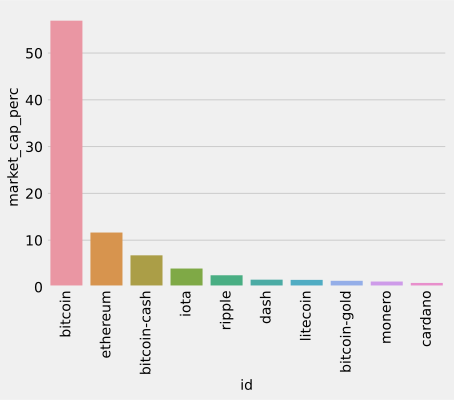

In [14]:
sns.barplot(data=a,x="id",y="market_cap_perc")
plt.xticks(rotation=90)

## 5. Making the plot easier to read and more informative
<p>While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here. Please see the warning above and do your own research.</em></p>

In [15]:
from math import log10
a["market_cap_log10"]=a["market_cap_usd"].apply(lambda x: log10(x))
a

,id,market_cap_usd,market_cap_perc,market_cap_log10
0,bitcoin,2.130493e+11,56.92,11.328480
1,ethereum,4.352945e+10,11.63,10.638783
2,bitcoin-cash,2.529585e+10,6.76,10.403049
3,iota,1.475225e+10,3.94,10.168858
4,ripple,9.365343e+09,2.50,9.971524
5,dash,5.794076e+09,1.55,9.762984
6,litecoin,5.634498e+09,1.51,9.750855
7,bitcoin-gold,4.920065e+09,1.31,9.691971
8,monero,4.331688e+09,1.16,9.636657
9,cardano,3.231420e+09,0.86,9.509393


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'bitcoin'),
  Text(1, 0, 'ethereum'),
  Text(2, 0, 'bitcoin-cash'),
  Text(3, 0, 'iota'),
  Text(4, 0, 'ripple'),
  Text(5, 0, 'dash'),
  Text(6, 0, 'litecoin'),
  Text(7, 0, 'bitcoin-gold'),
  Text(8, 0, 'monero'),
  Text(9, 0, 'cardano')])

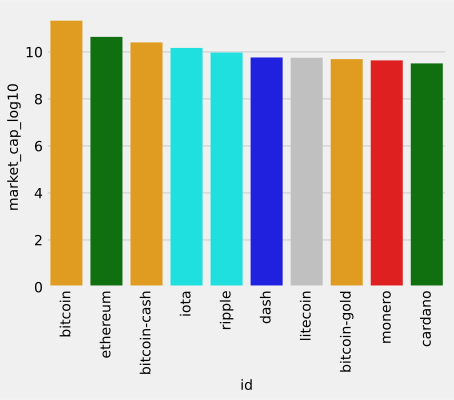

In [16]:
sns.barplot(data=a,x="id",y="market_cap_log10",palette=['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'bitcoin'),
  Text(1, 0, 'ethereum'),
  Text(2, 0, 'bitcoin-cash'),
  Text(3, 0, 'iota'),
  Text(4, 0, 'ripple'),
  Text(5, 0, 'dash'),
  Text(6, 0, 'litecoin'),
  Text(7, 0, 'bitcoin-gold'),
  Text(8, 0, 'monero'),
  Text(9, 0, 'cardano')])

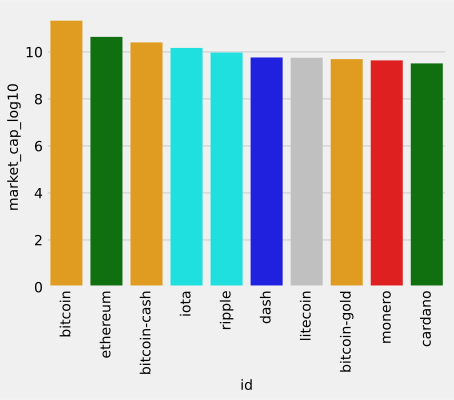

In [17]:
sns.barplot(data=a,x="id",y="market_cap_log10",
    palette=['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green'],
           )
plt.xticks(rotation=90)

In [18]:
c=a[["id","market_cap_usd"]]
c

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
5,dash,5.794076e+09
6,litecoin,5.634498e+09
7,bitcoin-gold,4.920065e+09
8,monero,4.331688e+09
9,cardano,3.231420e+09


<Axes: >

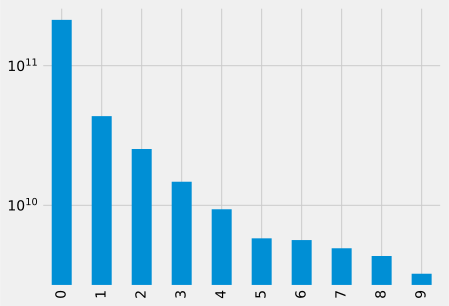

In [19]:
c["market_cap_usd"].plot.bar(logy=True)

## 6. What is going on?! Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [20]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

# Checking the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


## 7. Well, we can already see that things are *a bit* crazy
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

In [21]:
volatility["percent_change_24h"][:10].reset_index()

,id,percent_change_24h
0,flappycoin,-95.85
1,credence-coin,-94.22
2,coupecoin,-93.93
3,tyrocoin,-79.02
4,petrodollar,-76.55
5,bitok,-74.37
6,bankcoin,-68.56
7,tellurion,-63.75
8,shadow-token,-61.40
9,eusd,-58.89


[Text(0, 0, 'britcoin'),
 Text(1, 0, 'coexistcoin'),
 Text(2, 0, 'coimatic-2'),
 Text(3, 0, 'comet'),
 Text(4, 0, 'asiacoin'),
 Text(5, 0, 'eaglecoin'),
 Text(6, 0, 'beatcoin'),
 Text(7, 0, 'bitzeny'),
 Text(8, 0, 'cashcoin'),
 Text(9, 0, 'fedoracoin')]

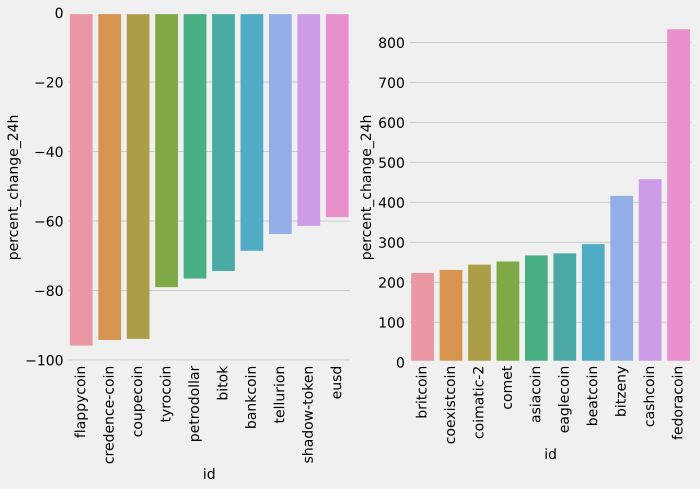

In [23]:
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

m=volatility["percent_change_24h"][:10].reset_index()
ax1=sns.barplot(data=m,x="id",y="percent_change_24h",ax=axes[0])
ax1.set_xticklabels(m["id"].values,rotation = 90)

n=volatility["percent_change_24h"].tail(10).reset_index()
ax2=sns.barplot(data=n,x="id",y="percent_change_24h",ax=axes[1])
ax2.set_xticklabels(n["id"].values,rotation = 90)


## 8. Ok, those are... interesting. Let's check the weekly Series too.
<p>800% daily increase?! Why are we doing this tutorial and not buying random coins?<sup>1</sup></p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.</p>
<p><em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</em></p>

In [35]:
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]
volatility = volatility.set_index('id').dropna()
volatility=volatility.sort_values('percent_change_7d')
volatility

,percent_change_24h,percent_change_7d
id,,
royalties,-9.06,-99.59
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
cagecoin,-36.26,-92.68
tyrocoin,-79.02,-87.43
...,...,...
yoyow,119.59,547.12
comet,252.07,560.46
btcmoon,-34.70,582.11


[Text(0, 0, 'litebitcoin'),
 Text(1, 0, 'asiacoin'),
 Text(2, 0, 'ebit'),
 Text(3, 0, 'petrodollar'),
 Text(4, 0, 'erc20'),
 Text(5, 0, 'yoyow'),
 Text(6, 0, 'comet'),
 Text(7, 0, 'btcmoon'),
 Text(8, 0, 'bitcoin-red'),
 Text(9, 0, 'bitzeny')]

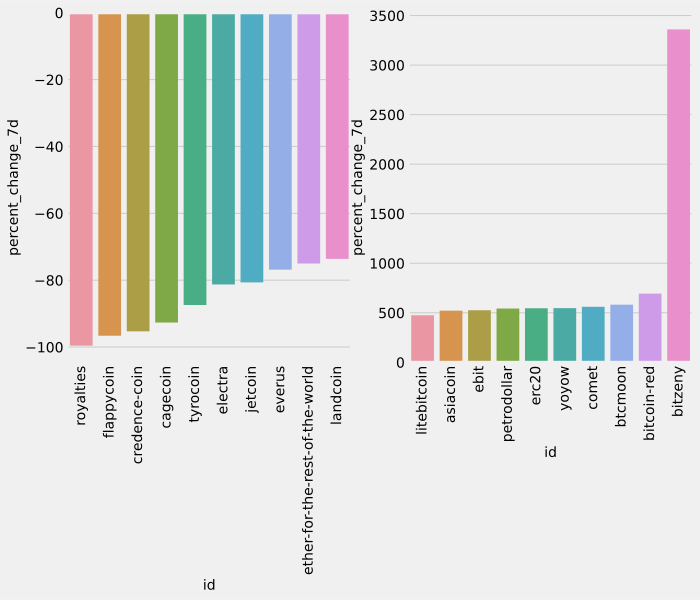

In [40]:
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

m=volatility["percent_change_7d"][:10].reset_index()
ax1=sns.barplot(data=m,x="id",y="percent_change_7d",ax=axes[0])
ax1.set_xticklabels(m["id"].values,rotation = 90)

n=volatility["percent_change_7d"].tail(10).reset_index()
ax2=sns.barplot(data=n,x="id",y="percent_change_7d",ax=axes[1])
ax2.set_xticklabels(n["id"].values,rotation = 90)


## 9. How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

In [43]:
# Selecting everything bigger than 10 billion 
market_cap_raw[market_cap_raw["market_cap_usd"]>10000000000]

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


## 10. Most coins are tiny
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>
<p><em>This is all for now. Thanks for completing this project!</em></p>

In [53]:
biggish=len(market_cap_raw.query('market_cap_usd>3e8'))
micro=len(market_cap_raw.query('market_cap_usd>=50e6 & market_cap_usd<=3e8'))
nano=len(market_cap_raw.query('market_cap_usd<50e6'))

<Axes: >

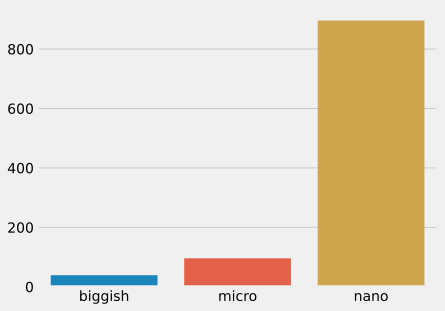

In [55]:
sns.barplot(x=["biggish","micro","nano"],y=[biggish,micro,nano])